<a href="https://colab.research.google.com/github/vishanth10/Airbnb_RDD_AB_test/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: i want to input .csv file

from google.colab import files
uploaded = files.upload()


Saving listings.csv to listings.csv


In [ ]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import statsmodels.api as sm
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['listings.csv']))


In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1489424,https://www.airbnb.com/rooms/1489424,20240506232017,2024-05-06,city scrape,"Welcoming, easygoing, comfy bed, entire level","Queen size bed, extra comfy mattress, with acc...",Quiet yet convenient.,https://a0.muscache.com/pictures/21977748/1dc8...,5294164,...,4.92,4.82,4.81,NaN,f,1,0,1,0,1.93
1,2992450,https://www.airbnb.com/rooms/2992450,20240506232017,2024-05-06,previous scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.56,3.22,3.67,NaN,f,1,1,0,0,0.08
2,3820211,https://www.airbnb.com/rooms/3820211,20240506232017,2024-05-06,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.81,4.82,4.79,NaN,f,4,4,0,0,2.53
3,5651579,https://www.airbnb.com/rooms/5651579,20240506232017,2024-05-06,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.87,4.79,4.64,NaN,f,2,1,1,0,3.13
4,6623339,https://www.airbnb.com/rooms/6623339,20240506232017,2024-05-06,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.69,4.80,4.72,NaN,f,4,4,0,0,2.89


In [ ]:
listings = pd.DataFrame(df)
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1489424,https://www.airbnb.com/rooms/1489424,20240506232017,2024-05-06,city scrape,"Welcoming, easygoing, comfy bed, entire level","Queen size bed, extra comfy mattress, with acc...",Quiet yet convenient.,https://a0.muscache.com/pictures/21977748/1dc8...,5294164,...,4.92,4.82,4.81,NaN,f,1,0,1,0,1.93
1,2992450,https://www.airbnb.com/rooms/2992450,20240506232017,2024-05-06,previous scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.56,3.22,3.67,NaN,f,1,1,0,0,0.08
2,3820211,https://www.airbnb.com/rooms/3820211,20240506232017,2024-05-06,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.81,4.82,4.79,NaN,f,4,4,0,0,2.53
3,5651579,https://www.airbnb.com/rooms/5651579,20240506232017,2024-05-06,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.87,4.79,4.64,NaN,f,2,1,1,0,3.13
4,6623339,https://www.airbnb.com/rooms/6623339,20240506232017,2024-05-06,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.69,4.80,4.72,NaN,f,4,4,0,0,2.89


In [ ]:
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
listings['host_is_superhost'] = listings['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
listings['host_response_rate'] = listings['host_response_rate'].str.rstrip('%').astype(float) / 100
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.rstrip('%').astype(float) / 100



In [ ]:
print(listings['host_is_superhost']==1)

0      False
1      False
2      False
3      False
4      False
       ...  
389    False
390    False
391    False
392    False
393     True
Name: host_is_superhost, Length: 394, dtype: bool


In [ ]:

# Ensure numeric columns are properly converted
numeric_cols = ['host_response_rate', 'review_scores_rating', 'availability_30', 'availability_60', 'availability_90', 'maximum_nights', 'minimum_nights', 'host_acceptance_rate','review_scores_accuracy',  ]
for col in numeric_cols:
    listings[col] = pd.to_numeric(listings[col], errors='coerce')

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            394 non-null    int64  
 1   listing_url                                   394 non-null    object 
 2   scrape_id                                     394 non-null    int64  
 3   last_scraped                                  394 non-null    object 
 4   source                                        394 non-null    object 
 5   name                                          394 non-null    object 
 6   description                                   384 non-null    object 
 7   neighborhood_overview                         231 non-null    object 
 8   picture_url                                   394 non-null    object 
 9   host_id                                       394 non-null    int

In [ ]:
listings = listings[listings['host_acceptance_rate'] >= 0.9]
# Calculate the occupancy rate for a period (let's assume 30 days for simplicity)
listings['occupancy_rate'] = 1- (listings['availability_90'] / 90)

# Define the running variable (weighted average of response rate and ratings)
listings['response_rate_normalized'] = listings['host_response_rate']

listings['host_acceptance_rate_normalized'] = listings['host_acceptance_rate']
listings['rating_normalized'] = listings['review_scores_rating'] / 5

listings['running_variable'] = listings['rating_normalized']*0.6 + listings['response_rate_normalized']*0.4
# listings['running_variable'] = listings['review_scores_rating'] / 5
listings


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,rating_normalized,running_variable,log_occupancy_rate,log_response_rate,log_host_acceptance_rate,log_rating,D,outcome,treatment,interaction
3,5651579,https://www.airbnb.com/rooms/5651579,20240506232017,2024-05-06,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,0.902,0.9412,0.405465,0.693147,0.688135,0.642906,0,0.500000,0,0.0000
7,9005989,https://www.airbnb.com/rooms/9005989,20240506232017,2024-05-06,city scrape,"Studio in The heart of Center SQ, in Albany NY",(21 years of age or older ONLY) NON- SMOKING.....,"There are many shops, restaurants, bars, museu...",https://a0.muscache.com/pictures/d242a77e-437c...,17766924,...,0.960,0.9760,1.173514,0.693147,0.693147,0.672944,0,2.233333,1,0.9760
8,9501054,https://www.airbnb.com/rooms/9501054,20240506232017,2024-05-06,city scrape,Spacious suite with full bath by Capital Center,Great location within walking distance to the ...,The place is located in the Historic Mansion n...,https://a0.muscache.com/pictures/45153167-d704...,29288920,...,0.906,0.9436,1.109662,0.693147,0.688135,0.645007,0,2.033333,0,0.0000
11,11639446,https://www.airbnb.com/rooms/11639446,20240506232017,2024-05-06,city scrape,$55twin($30 foreign student)FreeBF Noa/c no smoke,Regular breakfast free<br /><br />Lunch packed...,One block away to unique organic honest weigh ...,https://a0.muscache.com/pictures/1129f67c-dfb2...,61700428,...,0.962,0.9772,1.377926,0.693147,0.641854,0.673964,0,2.966667,1,0.9772
12,12284708,https://www.airbnb.com/rooms/12284708,20240506232017,2024-05-06,city scrape,"Well Lit Modern Room, Perfect Location Albany",Single family home with driveway close to Alba...,BBQ spot directly across from house.<br />Conv...,https://a0.muscache.com/pictures/0adcd911-d1ad...,36438637,...,0.922,0.9532,0.000000,0.693147,0.662688,0.653366,1,0.000000,1,0.9532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1102984130027939637,https://www.airbnb.com/rooms/1102984130027939637,20240506232017,2024-05-06,city scrape,Lovely 1 bedroom across the Park,Welcome to our lovely 1-bedroom apartment nest...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,37769478,...,0.914,0.9404,1.317301,0.683097,0.688135,0.649195,1,2.733333,0,0.0000
370,1104977057298366617,https://www.airbnb.com/rooms/1104977057298366617,20240506232017,2024-05-06,city scrape,"Safe, Affordable, Adorable w/ Hot Tub and Coffee",Welcome to our charming Airbnb located in the ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,382970529,...,1.000,1.0000,1.076139,0.693147,0.678034,0.693147,1,1.933333,1,1.0000
372,1111221935683053416,https://www.airbnb.com/rooms/1111221935683053416,20240506232017,2024-05-06,city scrape,Historical Pastures,This amazing historical apartment is located i...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,418250661,...,0.950,0.9700,1.360977,0.693147,0.693147,0.667829,0,2.900000,1,0.9700
374,1119844407084108907,https://www.airbnb.com/rooms/1119844407084108907,20240506232017,2024-05-06,city scrape,1 bed 1 bath Apartment,"Kick back and relax in this calm, stylish spac...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,477328400,...,1.000,1.0000,1.352393,0.693147,0.693147,0.693147,0,2.866667,1,1.0000


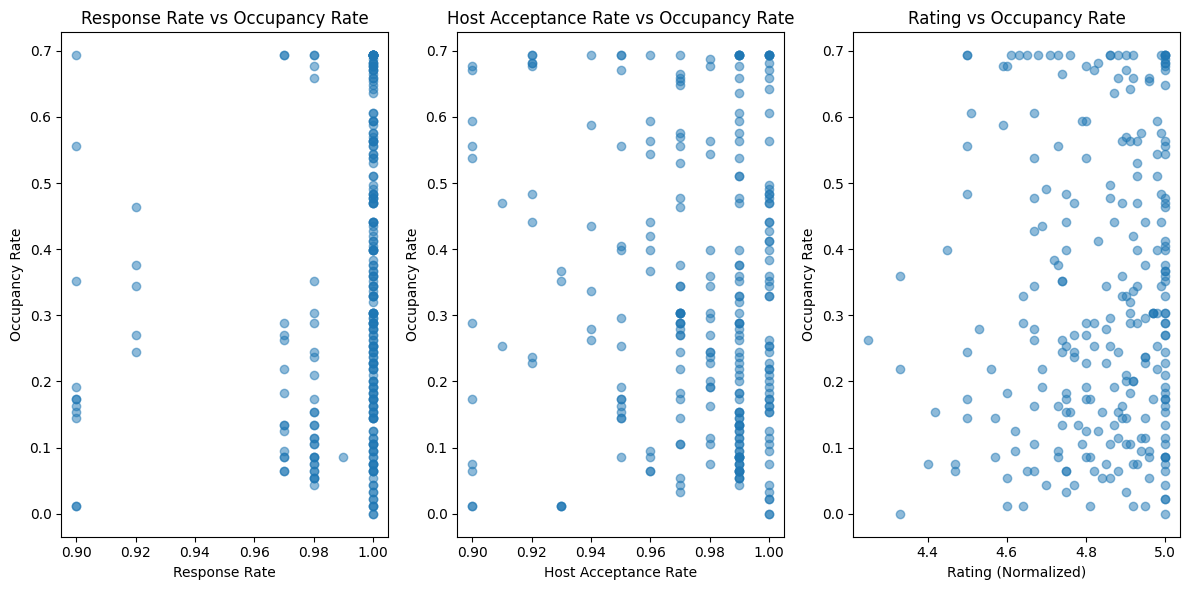

In [ ]:
listings = listings.dropna(subset=['response_rate_normalized', 'host_acceptance_rate_normalized', 'rating_normalized', 'occupancy_rate'])

listings['log_occupancy_rate'] = np.log1p(listings['occupancy_rate'])

# Plot 1: Response Rate vs Occupancy Rate
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(listings['response_rate_normalized'], listings['log_occupancy_rate'], alpha=0.5)
plt.xlabel('Response Rate')
plt.ylabel('Occupancy Rate')
plt.title('Response Rate vs Occupancy Rate')

# Plot 2: Host Acceptance Rate vs Occupancy Rate
plt.subplot(1, 3, 2)
plt.scatter(listings['host_acceptance_rate_normalized'], listings['log_occupancy_rate'], alpha=0.5)
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Occupancy Rate')
plt.title('Host Acceptance Rate vs Occupancy Rate')

# Plot 3: Rating vs Occupancy Rate
plt.subplot(1, 3, 3)
plt.scatter(listings['review_scores_rating'], listings['log_occupancy_rate'], alpha=0.5)
plt.xlabel('Rating (Normalized)')
plt.ylabel('Occupancy Rate')
plt.title('Rating vs Occupancy Rate')

plt.tight_layout()
plt.show()

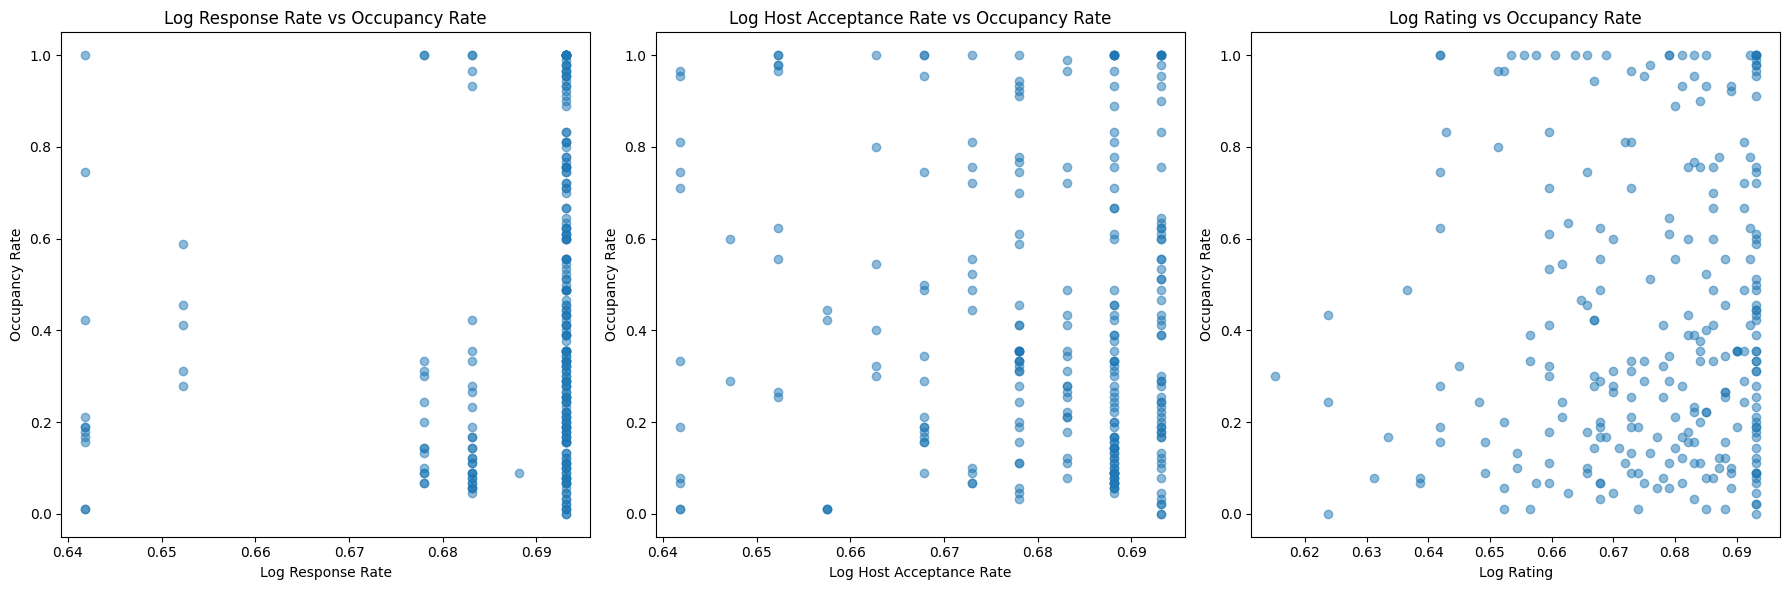

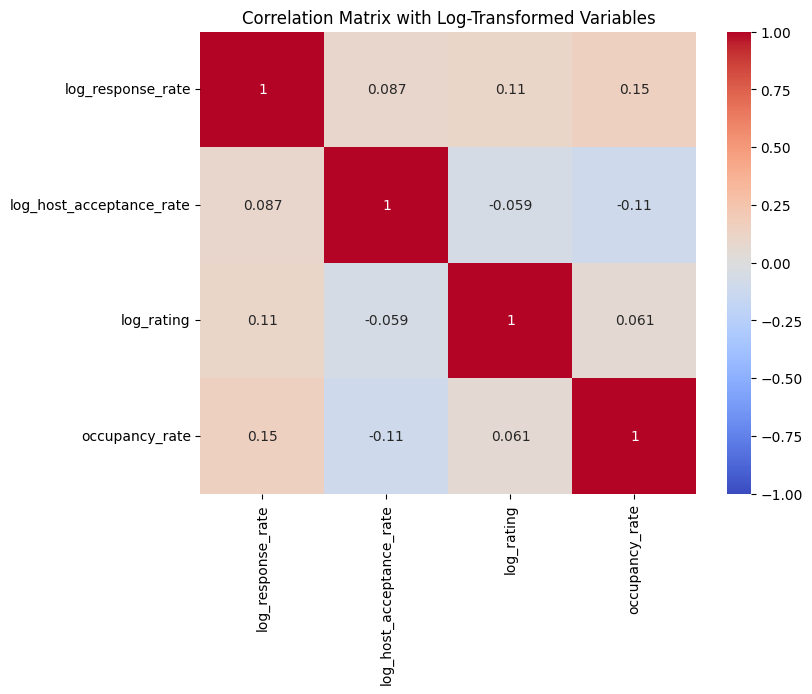

In [ ]:
import numpy as np
import seaborn as sns

# Apply log transformation to the X variables
listings['log_response_rate'] = np.log1p(listings['response_rate_normalized'])
listings['log_host_acceptance_rate'] = np.log1p(listings['host_acceptance_rate_normalized'])
listings['log_rating'] = np.log1p(listings['rating_normalized'])

# Plot 1: Log Response Rate vs Occupancy Rate
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(listings['log_response_rate'], listings['occupancy_rate'], alpha=0.5)
plt.xlabel('Log Response Rate')
plt.ylabel('Occupancy Rate')
plt.title('Log Response Rate vs Occupancy Rate')

# Plot 2: Log Host Acceptance Rate vs Occupancy Rate
plt.subplot(1, 3, 2)
plt.scatter(listings['log_host_acceptance_rate'], listings['occupancy_rate'], alpha=0.5)
plt.xlabel('Log Host Acceptance Rate')
plt.ylabel('Occupancy Rate')
plt.title('Log Host Acceptance Rate vs Occupancy Rate')

# Plot 3: Log Rating vs Occupancy Rate
plt.subplot(1, 3, 3)
plt.scatter(listings['log_rating'], listings['occupancy_rate'], alpha=0.5)
plt.xlabel('Log Rating')
plt.ylabel('Occupancy Rate')
plt.title('Log Rating vs Occupancy Rate')

plt.tight_layout()
plt.show()

# Calculate and display the correlation matrix with log-transformed variables
correlation_matrix = listings[['log_response_rate', 'log_host_acceptance_rate', 'log_rating', 'occupancy_rate']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Log-Transformed Variables')
plt.show()


In [ ]:
listings = listings.dropna(subset=['running_variable'])
listings['running_variable'].mean()

0.9758845849802371

In [ ]:
# Define the treatment indicator (Superhost status)
listings['D'] = listings['host_is_superhost']



In [ ]:
grouped_running_variable_mean = listings.groupby('D')['running_variable'].mean()
print(grouped_running_variable_mean)


D
0    0.960322
1    0.984041
Name: running_variable, dtype: float64


In [ ]:

# Define the outcome variable (occupancy rate)
listings['outcome'] = listings['occupancy_rate']

# Drop rows with missing values only in the essential columns
listings = listings.dropna(subset=['running_variable', 'D', 'outcome'])





In [ ]:
listings = listings[listings['running_variable'] >= 0.9]

In [ ]:


# Define the cutoff for Superhost status (assuming 0.9 as the threshold for illustration)
cutoff = 0.95

# Create the treatment variable based on the running variable
listings['treatment'] = (listings['running_variable'] >= cutoff).astype(int)

# Create the interaction term
listings['interaction'] = listings['running_variable'] * listings['treatment']

In [ ]:
# prompt: count listings['treatment']==1

print(listings['treatment'].sum())


216


In [ ]:
# Define the model
X = sm.add_constant(listings[['running_variable', 'treatment', 'interaction']])
y = listings['occupancy_rate']

# Fit the model
model = sm.OLS(y, X).fit()

# Display the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         occupancy_rate   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.150
Date:                Wed, 05 Jun 2024   Prob (F-statistic):              0.329
Time:                        20:17:45   Log-Likelihood:                -63.502
No. Observations:                 253   AIC:                             135.0
Df Residuals:                     249   BIC:                             149.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.1340      3.449  

In [ ]:
import matplotlib.pyplot as plt


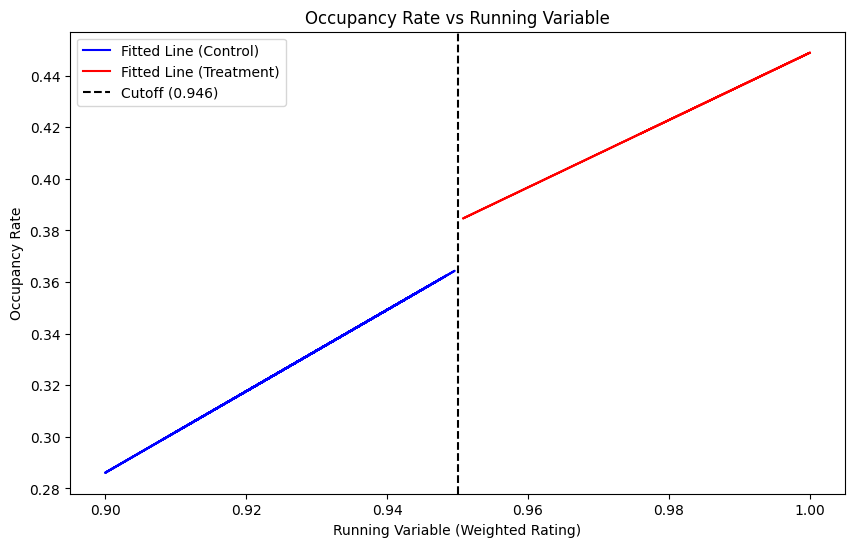

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot


# Fit a linear model for the control group (treatment = 0)
control_group = listings[listings['treatment'] == 0]
X_control = sm.add_constant(control_group[['running_variable']])
y_control = control_group['occupancy_rate']
model_control = sm.OLS(y_control, X_control).fit()
plt.plot(control_group['running_variable'], model_control.predict(X_control), color='blue', label='Fitted Line (Control)')

# Fit a linear model for the treatment group (treatment = 1)
treatment_group = listings[listings['treatment'] == 1]
X_treatment = sm.add_constant(treatment_group[['running_variable']])
y_treatment = treatment_group['occupancy_rate']
model_treatment = sm.OLS(y_treatment, X_treatment).fit()
plt.plot(treatment_group['running_variable'], model_treatment.predict(X_treatment), color='red', label='Fitted Line (Treatment)')

# Vertical line at cutoff
plt.axvline(x=cutoff, color='k', linestyle='--', label='Cutoff (0.946)')

# Plot labels and legend
plt.xlabel('Running Variable (Weighted Rating)')
plt.ylabel('Occupancy Rate')
plt.title('Occupancy Rate vs Running Variable')

plt.legend()
plt.show()